<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/project/Netflix_Movie_Recommendation_%F0%9F%8E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
netflix_data = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print(f"Netflix Data : {netflix_data.shape}")

Netflix Data : (8807, 12)


In [ ]:
netflix_data.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
netflix_data.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing value percentage
(netflix_data.isna().sum()/len(netflix_data)).sort_values(ascending=False)

director        0.299080
country         0.094357
cast            0.093675
date_added      0.001135
rating          0.000454
duration        0.000341
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [ ]:
# Kategorik değişkenler
cat_cols = [col for col in netflix_data.columns if netflix_data[col].dtypes == "O"]

# Nümerik (Sayısal) fakat kategorik değişkenler
num_but_cat = [col for col in netflix_data.columns if netflix_data[col].nunique() < 15 and netflix_data[col].dtypes != "O"]

# Kategorik görünümlü kardinal değişkenler
cat_but_car = [col for col in netflix_data.columns if netflix_data[col].nunique() > 15 and netflix_data[col].dtypes == "O"]

# Kategorik değişkenler toplamı = Kategorik değişken + Nümerik (Sayısal) fakat kategorik değişkenler
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Nümerik (Sayısal) değişkenler = Object türünde olmayanlar,
# nümerik (Sayısal) fakat kategorik değişkenlerde bulunmayanlar
num_cols = [col for col in netflix_data.columns if netflix_data[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

In [ ]:
print(f"Observations: {netflix_data.shape[0]}")
print(f"Variables: {netflix_data.shape[1]}")
print(f'cat_cols: {len(cat_cols)}', '-->', cat_cols)
print(f'num_cols: {len(num_cols)}', '-->', num_cols)
print(f'cat_but_car: {len(cat_but_car)}', '-->', cat_but_car)
print(f'num_but_cat: {len(num_but_cat)}', '-->', num_but_cat)

Observations: 8807
Variables: 12
cat_cols: 1 --> ['type']
num_cols: 1 --> ['release_year']
cat_but_car: 10 --> ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
num_but_cat: 0 --> []


In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('---------------------------------------------')
    if plot:
        value_counts = dataframe[col_name].value_counts()
        explode = [0,0.1]
        colors = ['lightgreen', 'lightblue']
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, explode=explode, labels=value_counts.index,
                autopct='%1.1f%%', startangle=140, shadow = True, colors=colors)

         type      Ratio
Movie    6131  69.615079
TV Show  2676  30.384921
---------------------------------------------


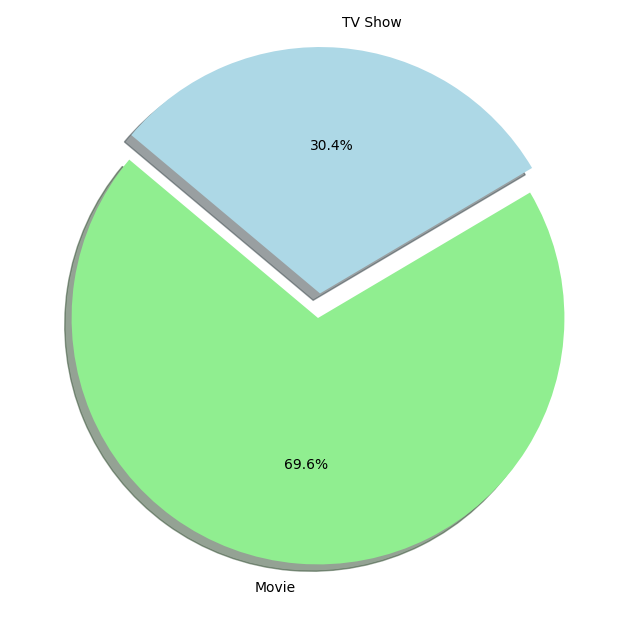

In [ ]:
# Kategorik değişkenlerin incelenmesi
for col in cat_cols:
    cat_summary(netflix_data, col, plot=True)

In [ ]:
# Sayısal değişkenlerin incelenmesi
netflix_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [ ]:
country_counts = netflix_data['country'].value_counts()
country_counts

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Text(0.5, 1.0, 'Distribution of Countries on Netflix')

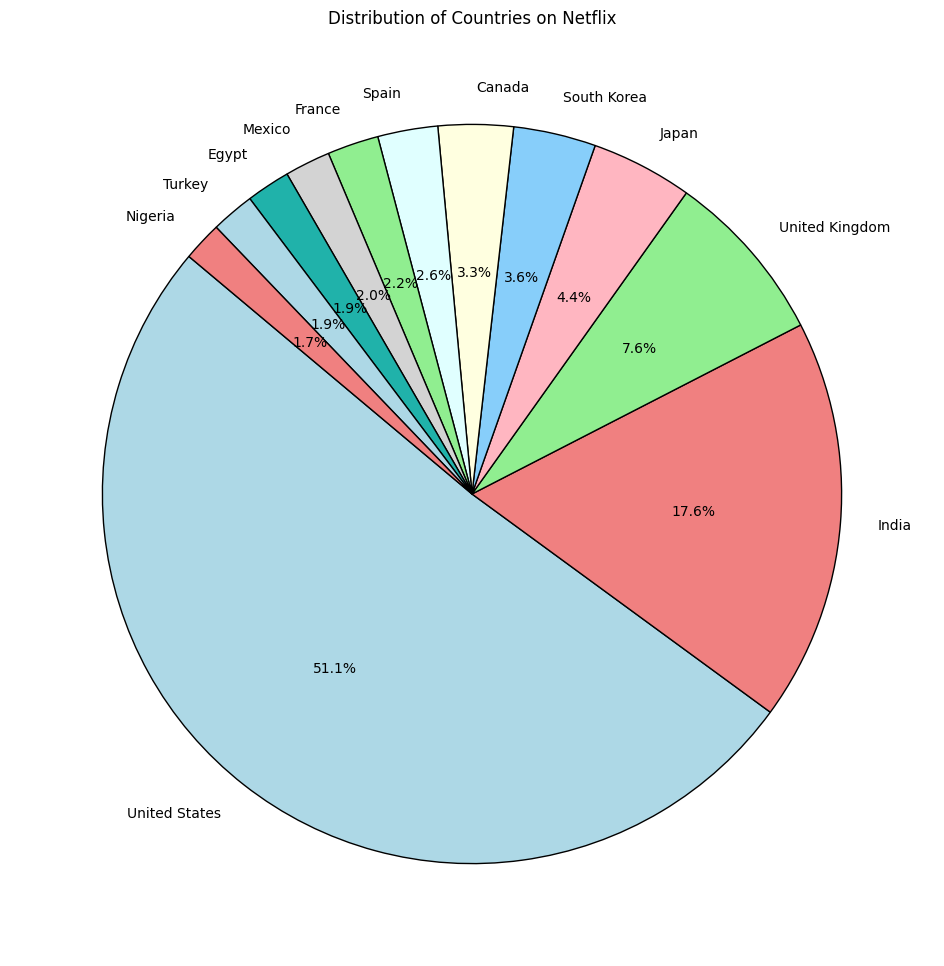

In [ ]:
num_countries_to_display = 12
top_countries = country_counts.head(num_countries_to_display)

colors = ['lightblue', 'lightcoral', 'lightgreen',
          'lightpink', 'lightskyblue', 'lightyellow',
          'lightcyan', 'lightgreen', 'lightgrey', 'lightseagreen']


plt.figure(figsize=(12, 12))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops = {'edgecolor': 'black'})
plt.title('Distribution of Countries on Netflix')

In [ ]:
# İzlenme oranı
rating_counts = netflix_data['rating'].value_counts()
rating_counts

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Top 10 Netflix Ratings')

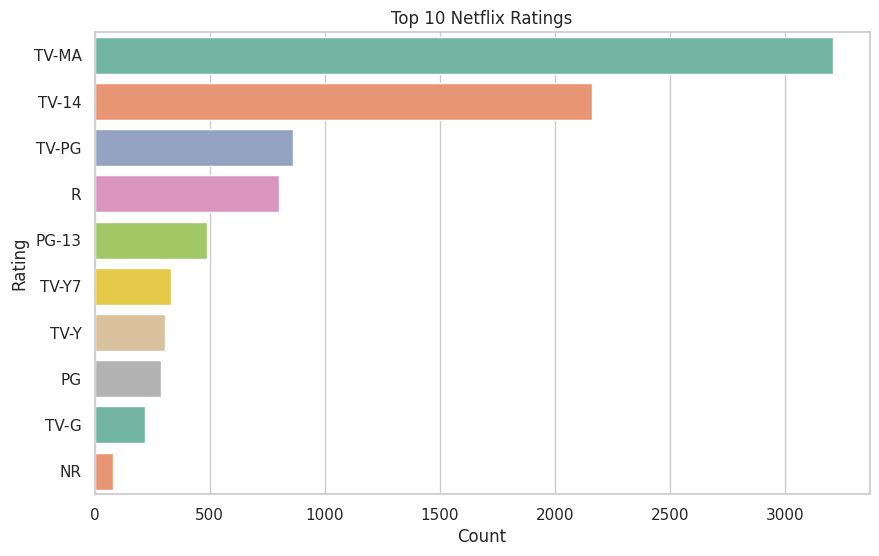

In [ ]:
# TV Ebeveyn Yönergeleri sistemi derecelendirmeleri barplot ile gösterme
num_ratings_to_display = 10
top_ratings = rating_counts.head(num_ratings_to_display)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # You can adjust the figure size
sns.barplot(x=top_ratings.values, y=top_ratings.index, orient='h', palette="Set2")
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Top 10 Netflix Ratings')

*    TV-MA rating indicates that the program is specifically designed to be viewed by adults and may not be suitable for children under 17 years old.

*   TV-14 rating indicates that the program may contain material that some parents or guardians may find unsuitable for children under 14 years of age.

*   TV-PG rating indicates that the program may contain material that some parents or guardians may find unsuitable for younger children. However, it is less intense than "TV-14" and "TV-MA.

*   The "R" rating stands for "Restricted," and it indicates that the content of the movie may not be suitable for viewers under 17 years of age without the presence or permission of a parent or guardian.



In [ ]:
# Piyasaya sürülme tarihine göre adet bilgisi
release_year_counts = netflix_data['release_year'].value_counts()
release_year_counts

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
release_year_counts.head(10)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Top 10 Netflix Release Years')

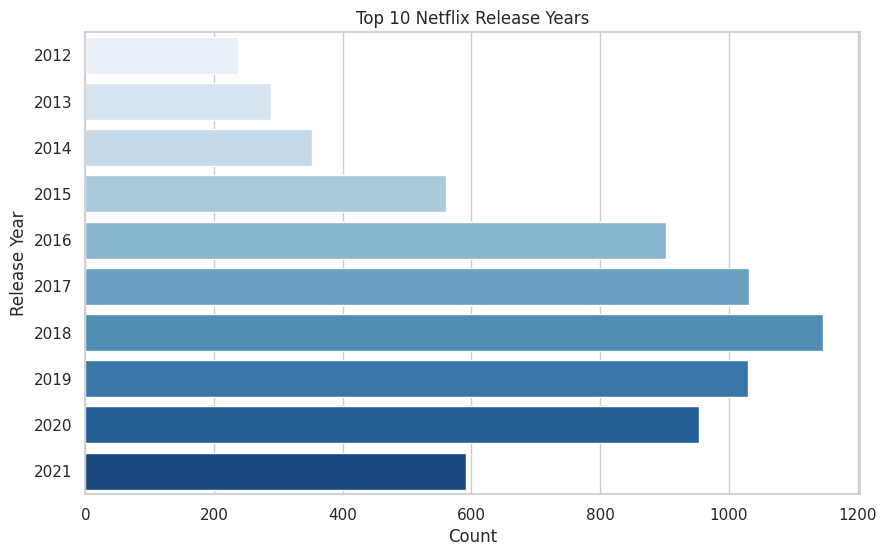

In [ ]:
# Barplot ile görselleştirme
num_years_to_display = 10
top_release_years = release_year_counts.head(num_years_to_display)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # Şekil boyutunu ayarlayabilirsiniz
sns.barplot(x=top_release_years.values, y=top_release_years.index,
            orient='h', palette="Blues")
plt.xlabel('Count')
plt.ylabel('Release Year')
plt.title('Top 10 Netflix Release Years')

In [ ]:
netflix_data['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
top_directors = netflix_data['director'].value_counts()
top_directors

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
# En çok film/dizi yönetmenliği yapmış kişiler
top_directors.head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 10 Directors on Netflix')

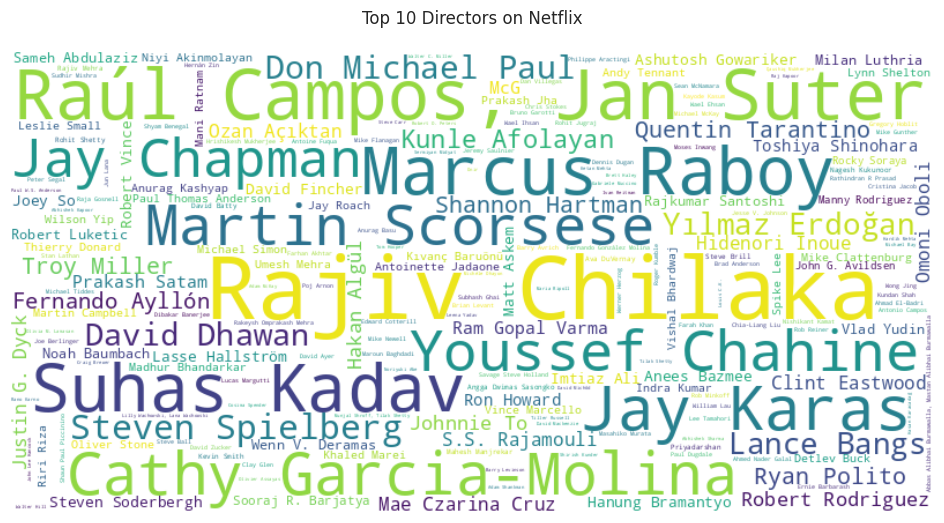

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_directors)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear, bicubic, nearest
plt.axis('off')
plt.title('Top 10 Directors on Netflix', pad=20)

In [ ]:
num_of_genres = netflix_data['listed_in'].value_counts()
num_of_genres

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Text(0, 0.5, 'Genre')

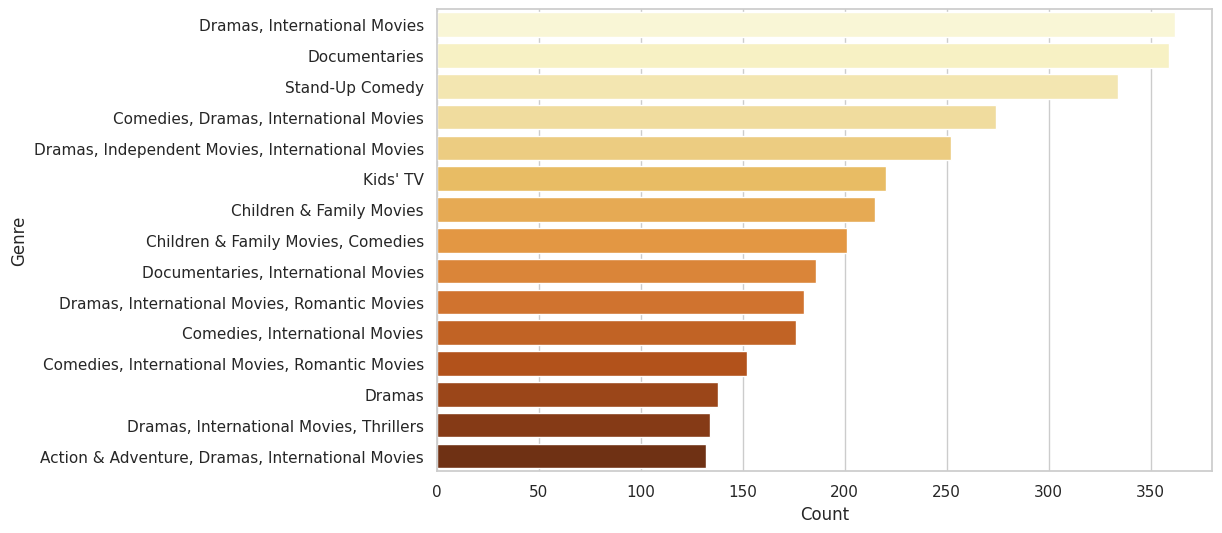

In [ ]:
num_of_genres_to_display = 15
top_genres = num_of_genres.head(num_of_genres_to_display)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # Şekil boyutunu ayarlayabilirsiniz
sns.barplot(x=top_genres.values, y=top_genres.index,
            orient='h', palette="YlOrBr")

plt.xlabel('Count')
plt.ylabel('Genre')

In [ ]:
(netflix_data.isna().sum()/len(netflix_data)).sort_values(ascending=False)

director        0.299080
country         0.094357
cast            0.093675
date_added      0.001135
rating          0.000454
duration        0.000341
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [ ]:
netflix_data_v2 = netflix_data.copy()

In [ ]:
# 'rating' ve 'duration' NaN verileri satır olarak drop edildi
netflix_data_v2.dropna(subset=['rating', 'duration'], inplace=True, axis=0)

In [ ]:
netflix_data_v2.shape

(8800, 12)

In [ ]:
# 'date_added' NaN olan veriler drop edildi
netflix_data_v2.dropna(subset=['date_added'], inplace=True, axis=0)

In [ ]:
netflix_data_v2.shape

(8790, 12)

In [ ]:
netflix_data_v2['cast'].replace(np.nan, 'Unknown cast', inplace=True)

In [ ]:
netflix_data_v2['country'].replace(np.nan, 'No country', inplace=True)

In [ ]:
netflix_data_v2['director'].replace(np.nan, 'Unknown director', inplace=True)

In [ ]:
no_cast_rows = netflix_data_v2[netflix_data_v2['director'] == 'Unknown director']
print(no_cast_rows)

     show_id     type                                title          director  \
1         s2  TV Show                        Blood & Water  Unknown director   
3         s4  TV Show                Jailbirds New Orleans  Unknown director   
4         s5  TV Show                         Kota Factory  Unknown director   
10       s11  TV Show  Vendetta: Truth, Lies and The Mafia  Unknown director   
14       s15  TV Show      Crime Stories: India Detectives  Unknown director   
...      ...      ...                                  ...               ...   
8795   s8796  TV Show                      Yu-Gi-Oh! Arc-V  Unknown director   
8796   s8797  TV Show                           Yunus Emre  Unknown director   
8797   s8798  TV Show                            Zak Storm  Unknown director   
8800   s8801  TV Show                   Zindagi Gulzar Hai  Unknown director   
8803   s8804  TV Show                          Zombie Dumb  Unknown director   

                                       

In [ ]:
(netflix_data_v2.isna().sum()/len(netflix_data)).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

I copyed the netflix_data DataFrame and named netflix_data_v2. Missing values handled as you can see in the above. I chose to delete some features due to small data includes and for other features, named it and left it in the data set.

In [ ]:
netflix_data_v2.columns = [col.upper() for col in netflix_data_v2.columns]

In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_data_v2['DURATION'] = netflix_data_v2['DURATION'].str.extract('(\d+)', expand=False).astype(int)

print(netflix_data_v2)

     SHOW_ID     TYPE                  TITLE          DIRECTOR  \
0         s1    Movie   Dick Johnson Is Dead   Kirsten Johnson   
1         s2  TV Show          Blood & Water  Unknown director   
2         s3  TV Show              Ganglands   Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans  Unknown director   
4         s5  TV Show           Kota Factory  Unknown director   
...      ...      ...                    ...               ...   
8802   s8803    Movie                 Zodiac     David Fincher   
8803   s8804  TV Show            Zombie Dumb  Unknown director   
8804   s8805    Movie             Zombieland   Ruben Fleischer   
8805   s8806    Movie                   Zoom      Peter Hewitt   
8806   s8807    Movie                 Zubaan       Mozez Singh   

                                                   CAST        COUNTRY  \
0                                          Unknown cast  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   S

In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_data_v2.describe()

,RELEASE_YEAR,DURATION
count,8790.000000,8790.000000
mean,2014.183163,69.934471
std,8.825466,50.794433
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.500000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [ ]:
netflix_data_v2.DURATION.value_counts()

1      1791
2       421
3       199
90      152
94      146
       ... 
189       1
273       1
212       1
224       1
191       1
Name: DURATION, Length: 210, dtype: int64

In [ ]:
netflix_data.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
# 'rating' oranlarına göre izlenme sürelerinin sıralaması
longest_watching = netflix_data_v2.RATING.value_counts().head()
longest_watching

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
Name: RATING, dtype: int64

In [ ]:
netflix_data_v2['COUNTRY']

0       United States
1        South Africa
2          No country
3          No country
4               India
            ...      
8802    United States
8803       No country
8804    United States
8805    United States
8806            India
Name: COUNTRY, Length: 8790, dtype: object

In [ ]:
# Eklenme tarihlerine göre hangi ayda olduklarını 'string' türünde gösterme
netflix_data_v2['DATE_ADDED'] = pd.to_datetime(netflix_data_v2['DATE_ADDED'])
netflix_data_v2['NEW_RELEASE_MONTH'] = netflix_data_v2['DATE_ADDED'].dt.strftime('%B')

In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION,NEW_RELEASE_MONTH
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [ ]:
# 'TYPE' göre yeni feature atama
netflix_data_v2.loc[(netflix_data_v2["TYPE"] == "Movie"), "NEW_CONTENT_TYPE"] = 1
netflix_data_v2.loc[(netflix_data_v2["TYPE"] == "TV Show"), "NEW_CONTENT_TYPE"] = 0

In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION,NEW_RELEASE_MONTH,NEW_CONTENT_TYPE
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,1.0
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,0.0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,0.0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,1.0
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,0.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,1.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,1.0


In [ ]:
# Başlık uzunluğuna göre yeni feature ekleme
netflix_data_v2['NEW_TITLE_LENGTH'] = netflix_data_v2['TITLE'].apply(len)

In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION,NEW_RELEASE_MONTH,NEW_CONTENT_TYPE,NEW_TITLE_LENGTH
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,1.0,20
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,0.0,13
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,0.0,9
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,0.0,21
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,1.0,6
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,0.0,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,1.0,10
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,1.0,4


In [ ]:
# Çıkış tarihi ve verilere eklenme arasındaki süre farkı özelliği çıkarma
netflix_data_v2['NEW_YEAR_ADDED'] = netflix_data_v2['DATE_ADDED'].dt.year
netflix_data_v2['NEW_YEAR_DIFFERENCE'] = netflix_data_v2['NEW_YEAR_ADDED'] - netflix_data_v2['RELEASE_YEAR']
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION,NEW_RELEASE_MONTH,NEW_CONTENT_TYPE,NEW_TITLE_LENGTH,NEW_YEAR_ADDED,NEW_YEAR_DIFFERENCE
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,1.0,20,2021,1
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,0.0,13,2021,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,0.0,9,2021,0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,0.0,21,2021,0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,0.0,12,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,1.0,6,2019,12
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,0.0,11,2019,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,1.0,10,2019,10
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,1.0,4,2020,14


In [ ]:
rating_to_age_mapping = {
    'TV-MA': 'Adults',
    'TV-14': 'Teens',
    'TV-PG': 'Children',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-Y7': 'Children',
    'TV-Y': 'Children',
    'PG': 'Children',
    'TV-G': 'Children',
    'NR': 'Unrated',
    'G': 'Children',
    'TV-Y7-FV': 'Children',
    'NC-17': 'Adults',
    'UR': 'Unrated'
}

netflix_data_v2['NEW_AGE_RATING'] = netflix_data_v2['RATING'].map(rating_to_age_mapping)
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION,NEW_RELEASE_MONTH,NEW_CONTENT_TYPE,NEW_TITLE_LENGTH,NEW_YEAR_ADDED,NEW_YEAR_DIFFERENCE,NEW_AGE_RATING
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,1.0,20,2021,1,Teens
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,0.0,13,2021,0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,0.0,9,2021,0,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,0.0,21,2021,0,Adults
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,0.0,12,2021,0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,1.0,6,2019,12,Adults
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,0.0,11,2019,1,Children
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,1.0,10,2019,10,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,1.0,4,2020,14,Children


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in netflix_data_v2.columns if 12 >= netflix_data_v2[col].nunique() > 2]
netflix_data_v2 = one_hot_encoder(netflix_data_v2, ohe_cols, drop_first=True)

In [ ]:
print(netflix_data_v2.describe())

       RELEASE_YEAR     DURATION  NEW_CONTENT_TYPE  NEW_TITLE_LENGTH  \
count   8790.000000  8790.000000       8790.000000        8790.00000   
mean    2014.183163    69.934471          0.696928          17.71843   
std        8.825466    50.794433          0.459612          10.62300   
min     1925.000000     1.000000          0.000000           1.00000   
25%     2013.000000     2.000000          0.000000          10.00000   
50%     2017.000000    88.500000          1.000000          15.00000   
75%     2019.000000   106.000000          1.000000          23.00000   
max     2021.000000   312.000000          1.000000         104.00000   

       NEW_YEAR_ADDED  NEW_YEAR_DIFFERENCE  NEW_RELEASE_MONTH_August  \
count     8790.000000          8790.000000               8790.000000   
mean      2018.873606             4.690444                  0.085779   
std          1.573568             8.790029                  0.280054   
min       2008.000000            -3.000000                  0.0

In [ ]:
filtered_records = netflix_data_v2[netflix_data_v2['NEW_YEAR_DIFFERENCE'] == -3]
filtered_records

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,...,NEW_RELEASE_MONTH_July,NEW_RELEASE_MONTH_June,NEW_RELEASE_MONTH_March,NEW_RELEASE_MONTH_May,NEW_RELEASE_MONTH_November,NEW_RELEASE_MONTH_October,NEW_RELEASE_MONTH_September,NEW_AGE_RATING_Children,NEW_AGE_RATING_Teens,NEW_AGE_RATING_Unrated
7112,s7113,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,2016,TV-MA,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
filtered_records = netflix_data_v2[netflix_data_v2['NEW_TITLE_LENGTH'] == 1]
filtered_records

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,...,NEW_RELEASE_MONTH_July,NEW_RELEASE_MONTH_June,NEW_RELEASE_MONTH_March,NEW_RELEASE_MONTH_May,NEW_RELEASE_MONTH_November,NEW_RELEASE_MONTH_October,NEW_RELEASE_MONTH_September,NEW_AGE_RATING_Children,NEW_AGE_RATING_Teens,NEW_AGE_RATING_Unrated
2069,s2070,TV Show,H,Unknown director,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,2020-09-01,2002,TV-MA,4,...,0,0,0,0,0,0,1,0,0,0
5958,s5959,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,...,0,0,0,0,1,0,0,0,1,0
7155,s7156,TV Show,K,Unknown director,"Daisuke Namikawa, Daisuke Ono, Mikako Komatsu,...",Japan,2016-12-01,2012,TV-MA,1,...,0,0,0,0,0,0,0,0,0,0
7687,s7688,Movie,P,Paul Spurrier,"Suangporn Jaturaphut, Opal, Dor Yodrak, Pisama...","United Kingdom, Thailand",2019-05-31,2006,TV-MA,105,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
cat_cols = [col for col in netflix_data_v2.columns if netflix_data_v2[col].dtypes == "O"]

In [ ]:
cat_cols

['SHOW_ID',
 'TYPE',
 'TITLE',
 'DIRECTOR',
 'CAST',
 'COUNTRY',
 'RATING',
 'LISTED_IN',
 'DESCRIPTION']

In [ ]:
num_cols = [col for col in netflix_data_v2.columns if netflix_data_v2[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

num_but_cat = [col for col in netflix_data_v2.columns if netflix_data_v2[col].nunique() < 15 and netflix_data_v2[col].dtypes != "O"]
num_cols

['DATE_ADDED',
 'RELEASE_YEAR',
 'DURATION',
 'NEW_CONTENT_TYPE',
 'NEW_TITLE_LENGTH',
 'NEW_YEAR_ADDED',
 'NEW_YEAR_DIFFERENCE',
 'NEW_RELEASE_MONTH_August',
 'NEW_RELEASE_MONTH_December',
 'NEW_RELEASE_MONTH_February',
 'NEW_RELEASE_MONTH_January',
 'NEW_RELEASE_MONTH_July',
 'NEW_RELEASE_MONTH_June',
 'NEW_RELEASE_MONTH_March',
 'NEW_RELEASE_MONTH_May',
 'NEW_RELEASE_MONTH_November',
 'NEW_RELEASE_MONTH_October',
 'NEW_RELEASE_MONTH_September',
 'NEW_AGE_RATING_Children',
 'NEW_AGE_RATING_Teens',
 'NEW_AGE_RATING_Unrated']

In [ ]:
netflix_data_v2 = netflix_data_v2.reset_index(drop=True)

TF-IDF (Terim Frekansı - Ters Belge Frekansı) ise TF ve IDF'nin çarpımıdır ve bir terimin bir belgedeki önemini hesaplamak için kullanılır. Bu ölçüm, bir terimin bir belgede ne kadar sık geçtiğini (TF) ve bu terimin koleksiyon içinde ne kadar nadir olduğunu (IDF) dikkate alarak belirli bir terimin bir belgedeki önemini belirlemek için kullanılır.

In [ ]:
# 4 tane özelliği birleştir
combined_features = netflix_data_v2['TITLE']+" "+netflix_data_v2['CAST']+ " "+netflix_data_v2['DESCRIPTION']+" "+netflix_data_v2['LISTED_IN']

In [ ]:
print(combined_features)

0       Dick Johnson Is Dead Unknown cast As her fathe...
1       Blood & Water Ama Qamata, Khosi Ngema, Gail Ma...
2       Ganglands Sami Bouajila, Tracy Gotoas, Samuel ...
3       Jailbirds New Orleans Unknown cast Feuds, flir...
4       Kota Factory Mayur More, Jitendra Kumar, Ranja...
                              ...                        
8785    Zodiac Mark Ruffalo, Jake Gyllenhaal, Robert D...
8786    Zombie Dumb Unknown cast While living alone in...
8787    Zombieland Jesse Eisenberg, Woody Harrelson, E...
8788    Zoom Tim Allen, Courteney Cox, Chevy Chase, Ka...
8789    Zubaan Vicky Kaushal, Sarah-Jane Dias, Raaghav...
Length: 8790, dtype: object


In [ ]:
# Metin belgelerini TF-IDF vektörlerine dönüştürür ve gerekli ön işlemleri de yapar
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 12415)	0.10676001949523917
  (0, 21032)	0.289670817630137
  (0, 14816)	0.17098530660006014
  (0, 6221)	0.17893497046221674
  (0, 44913)	0.14011043777903276
  (0, 19375)	0.141383511706814
  (0, 45345)	0.05046951372178231
  (0, 48270)	0.19472144089210483
  (0, 9427)	0.26731888802739723
  (0, 2191)	0.049811453668805766
  (0, 21371)	0.26731888802739723
  (0, 20888)	0.05842278679125473
  (0, 11091)	0.15297810137920806
  (0, 42526)	0.23999605867876245
  (0, 24104)	0.23777124431059113
  (0, 15489)	0.19706771309874907
  (0, 25922)	0.10599263214634504
  (0, 19784)	0.1454109398160808
  (0, 32184)	0.05397051496503787
  (0, 13950)	0.18544455192572698
  (0, 44885)	0.08825330873559643
  (0, 31073)	0.2623479882815022
  (0, 15118)	0.13908663693325446
  (0, 19464)	0.08877753669592442
  (0, 3085)	0.0975016260946062
  :	:
  (8789, 46298)	0.16805700916864005
  (8789, 39701)	0.17753276944982183
  (8789, 14829)	0.15611896305937922
  (8789, 27295)	0.1488187353106096
  (8789, 23445)	0.15185808997382014


Kosinüs Benzerliği

In [ ]:
# benzerlik skorlarını kosinüs ile elde etme yöntemi
similarity = cosine_similarity(feature_vectors)

Bu fonksiyon, metin verilerini vektör temsillerine dönüştürdükten sonra bu vektörler arasındaki benzerliği kosinüs benzerliği ölçümü ile hesaplar. Kosinüs benzerliği, iki vektör arasındaki açının kosinüsüne dayalı bir benzerlik ölçüsüdür ve vektörler arasındaki açı ne kadar küçükse, benzerlik o kadar yüksektir.

In [ ]:
similarity

array([[1.        , 0.01003291, 0.02060737, ..., 0.00917289, 0.01345707,
        0.02971708],
       [0.01003291, 1.        , 0.02104711, ..., 0.00101406, 0.        ,
        0.00265178],
       [0.02060737, 0.02104711, 1.        , ..., 0.00549669, 0.01019614,
        0.03065668],
       ...,
       [0.00917289, 0.00101406, 0.00549669, ..., 1.        , 0.05642918,
        0.00485172],
       [0.01345707, 0.        , 0.01019614, ..., 0.05642918, 1.        ,
        0.00913282],
       [0.02971708, 0.00265178, 0.03065668, ..., 0.00485172, 0.00913282,
        1.        ]])

In [ ]:
print(similarity.shape)

(8790, 8790)


In [ ]:
netflix_data_v2

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,...,NEW_RELEASE_MONTH_July,NEW_RELEASE_MONTH_June,NEW_RELEASE_MONTH_March,NEW_RELEASE_MONTH_May,NEW_RELEASE_MONTH_November,NEW_RELEASE_MONTH_October,NEW_RELEASE_MONTH_September,NEW_AGE_RATING_Children,NEW_AGE_RATING_Teens,NEW_AGE_RATING_Unrated
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,...,0,0,0,0,0,0,1,0,1,0
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,...,0,0,0,0,0,0,1,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021-09-24,2021,TV-MA,1,...,0,0,0,0,0,0,1,0,0,0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,No country,2021-09-24,2021,TV-MA,1,...,0,0,0,0,0,0,1,0,0,0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,...,0,0,0,0,1,0,0,0,0,0
8786,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,No country,2019-07-01,2018,TV-Y7,2,...,1,0,0,0,0,0,0,1,0,0
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,...,0,0,0,0,1,0,0,0,0,0
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
netflix_data_v2[netflix_data_v2['TITLE']=='Go! Go! Cory Carson: Chrissy Takes the Wheel'].index[0]

23

In [ ]:
similarity[23]

array([0.01339489, 0.0216472 , 0.01820665, ..., 0.01873491, 0.02210284,
       0.00953602])

In [ ]:
distance = sorted(list(enumerate(similarity[23])), reverse=True, key=lambda vector:vector[1])

In [ ]:
similar_top_10 = distance[:10]
similar_top_10

[(23, 1.0000000000000002),
 (2579, 0.5647877247531592),
 (1892, 0.4306093576221833),
 (254, 0.3852269909787926),
 (1635, 0.35226145436507117),
 (2166, 0.31486692570198704),
 (3385, 0.11412929801398866),
 (3469, 0.10689230626855892),
 (615, 0.09022688913018938),
 (6924, 0.08906308713314333)]

In [ ]:
similar_indices = [index for index, _ in similar_top_10]

In [ ]:
netflix_data_v2['TITLE'].iloc[similar_indices]

23      Go! Go! Cory Carson: Chrissy Takes the Wheel
2579                Go! Go! Cory Carson: The Chrissy
1892                 A Go! Go! Cory Carson Halloween
254                              Go! Go! Cory Carson
1635                 A Go! Go! Cory Carson Christmas
2166               A Go! Go! Cory Carson Summer Camp
3385                       Breakfast, Lunch & Dinner
3469                      Little Baby Bum: Go Buster
615                        Why Do Fools Fall in Love
6924                       Harry Benson: Shoot First
Name: TITLE, dtype: object

In [ ]:
# yukarıdakileri fonkisyona alalım
def recommend_movie(movie):
  index = netflix_data_v2[netflix_data_v2['TITLE']==movie].index[0]
  # benzerlik değerlerine göre sıralayıp uzaklık değerine atıyoruz
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
  similar_indices = [index for index, _ in distance[:10]]
  print(netflix_data_v2['TITLE'].iloc[similar_indices])

In [ ]:
recommend_movie('Ganglands')

2                               Ganglands
2668                      Earth and Blood
5480          Tracy Morgan: Staying Alive
4399                              Warrior
3976               The Eagle of El-Se'eed
3425                          Street Flow
5819                              Cocaine
5436                       My Little Baby
3789                       Killer Ratings
697     Elite Short Stories: Carla Samuel
Name: TITLE, dtype: object


In [ ]:
recommend_movie('Monster Family')

7474                                       Monster Family
1871                  Super Monsters: Dia de los Monsters
4534                        Super Monsters Save Halloween
3456               Super Monsters: Vida's First Halloween
3442    The Spooky Tale of Captain Underpants Hack-a-ween
5644                  Marvel's Hulk: Where Monsters Dwell
1892                      A Go! Go! Cory Carson Halloween
7482                            Monster High: Ghouls Rule
1581        Super Monsters: Santa’s Super Monster Helpers
1844              A Babysitter's Guide to Monster Hunting
Name: TITLE, dtype: object


In [ ]:
recommend_movie('Zoom')

8788                                      Zoom
4245                Tim Allen: ReWires America
4244                   Tim Allen: Men Are Pigs
6942                                 Hedgehogs
4205                            The Last Laugh
4178                     Marvel's The Punisher
6633             Dr. Seuss' The Cat in the Hat
5945                      The Ryan White Story
8327    The Heyday of the Insensitive Bastards
593                                   Snow Day
Name: TITLE, dtype: object


In [ ]:
with open('netflix_titles.pkl', 'wb') as file1:
    pickle.dump(netflix_data_v2, file1)

with open('recommend_movie.pkl', 'wb') as file2:
    pickle.dump(similarity, file2)

with open('netflix_titles.pkl', "rb") as file1:
    pickle.load(file1)

with open('recommend_movie.pkl', "rb") as file2:
    pickle.load(file2)